In [ ]:
from plotnine import *
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np

# Regression Data

The first dataset to look at is California housing data.

A regression model makes the most sense for this data.

In [ ]:
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing(as_frame=1)
cali_df = cali_data.frame
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(cali_data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The target for this dataset is MedHouseVal, or Median House Value. This is the metric we want to create a model to predict for based on the other variables in the dataset.

In [ ]:
X = cali_data.data
y = cali_data.target
print(y.name)

MedHouseVal


Let's plot each metric against each other to see if there are some visual correlations.

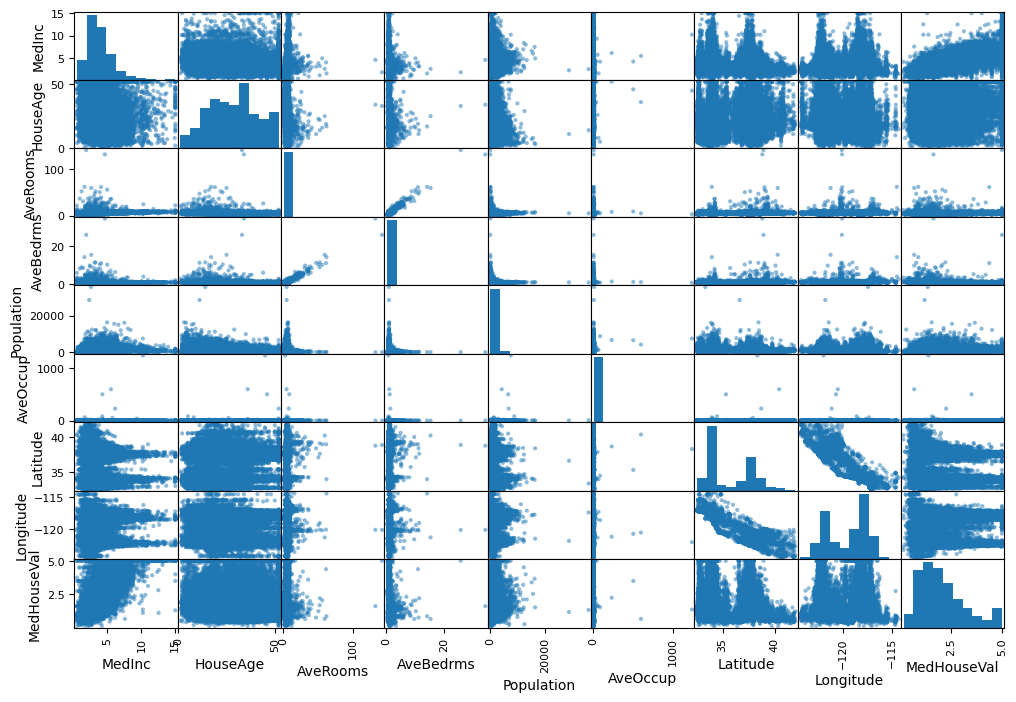

In [ ]:
scatter_matrix(cali_df, figsize=(12,8))
plt.show()

In [ ]:
# More plots here as you see fit

In [ ]:
# Focus on the features that makes sense by dropping other columns
# You can also skip this and train with all features.

Or instead, try using SelectKBest to use Sklearn's library to make statistical decisions on features

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

                        # !!! select number of features !!!
skb = SelectKBest(f_regression, k=)
X = skb.fit_transform(X, y)

# This loop uses the boolean support mask of the skb to re-apply the column names 
# of our features to make life easier
bool_mask = skb.get_support()
new_features = []

for b, feature in zip(bool_mask, cali_data.feature_names):
    if b:
        new_features.append(feature)

df = pd.DataFrame(X, columns=new_features)
df

SyntaxError: invalid syntax (1637750933.py, line 5)

# Model

Choose a model from the scikit-learn machine learning library.

See the Sklearn User Guide for the available models, and some examples for usage.

API: https://scikit-learn.org/stable/modules/classes.html

Below are some common imports of various model types. Use the API to determine usage for these model types

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# Linear Regression
from sklearn.linear_model import LinearRegression

# Support Vector Machine
from sklearn.svm import SVR

# Stochastic Gradient Descent
from sklearn.linear_model import SGDRegressor

# K Nearest Neighbors
from sklearn.neighbors import KNeighborsRegressor

# Decision Trees 
from sklearn.tree import DecisionTreeRegressor

# Neural Network
from sklearn.neural_network import MLPRegressor

# Elastic Net Regressor
from sklearn.linear_model import ElasticNet

# Kernel Ridge Regressor
from sklearn.kernel_ridge import KernelRidge

# Bayesian Ridge Regression
from sklearn.linear_model import BayesianRidge

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor

Split the data into training and testing. Test size changes the partition size.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Define model here and train with .fit()
model =  # choose model
model.fit(X_train, y_train)

KNeighborsRegressor()

Cross Validation for Regression - this cell may take some time to run depending on the model you chose:

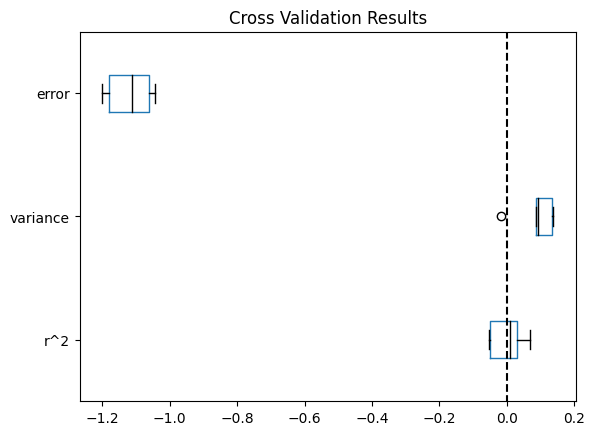

In [ ]:
# Try different types of scoring here too: https://scikit-learn.org/stable/modules/model_evaluation.html
r2 = cross_val_score(model, X, y, cv=5, scoring='r2');
var = cross_val_score(model, X, y, cv = 5, scoring = 'explained_variance');
mean_sq_err = cross_val_score(model, X, y, cv = 5, scoring = 'mean_squared_error');

metrics = []
metrics.append(r2)
metrics.append(var)
metrics.append(mean_sq_err)
metrics = pd.DataFrame(metrics).T
metrics.columns = ['r^2', 'variance','error']

color = {"whiskers": "black", "medians": "black", "caps": "black"}
metrics.plot.box(vert=False, color=color)
plt.axvline(x=0, ymin=-1, ymax=1, color="black", linestyle="--")
_ = plt.title("Cross Validation Results")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cbaedb1f-e080-44ef-8c4c-e26e8e2ffbfc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>